In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Dropping the species column (if applicable, but in this dataset, the target is separate)
print("Iris dataset loaded and species column dropped successfully.")
iris_df.head()


Iris dataset loaded and species column dropped successfully.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\I355119\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


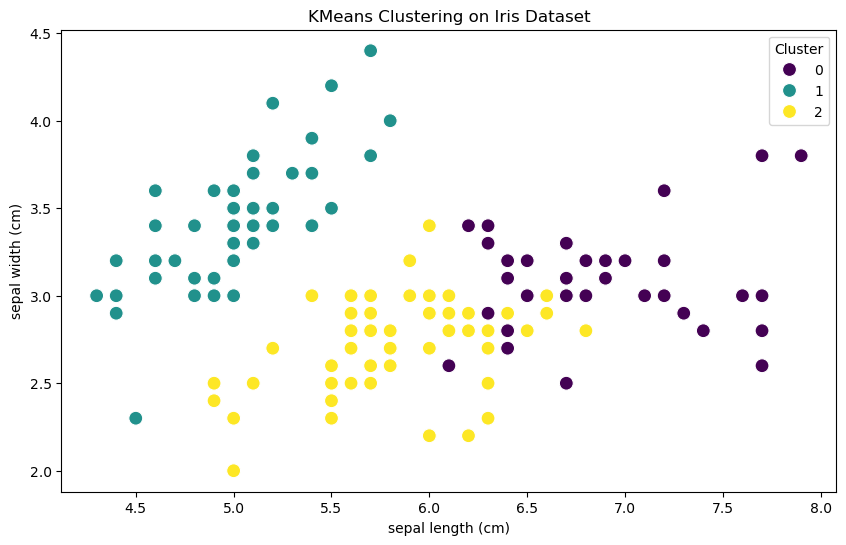

In [4]:
#2.Clustering Algorithm Implementation (8 marks)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['Cluster_KMeans'] = kmeans.fit_predict(iris_df)

# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1],
    hue=iris_df['Cluster_KMeans'], palette='viridis', s=100
)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()


A) KMeans Clustering
1. Description of KMeans Clustering KMeans clustering is a centroid-based algorithm that partitions the dataset into 
k clusters. The algorithm works as follows:
Randomly initializes k cluster centroids.
Assigns each data point to the nearest centroid.
Updates centroids as the mean of the assigned points.
Repeats the process until convergence (when centroids stop changing significantly).
                                       
Why KMeans is suitable for the Iris dataset?

The Iris dataset contains continuous numerical features that are well-suited for distance-based clustering.
It is known to have natural groupings (species), making it ideal for exploratory clustering like KMeans.

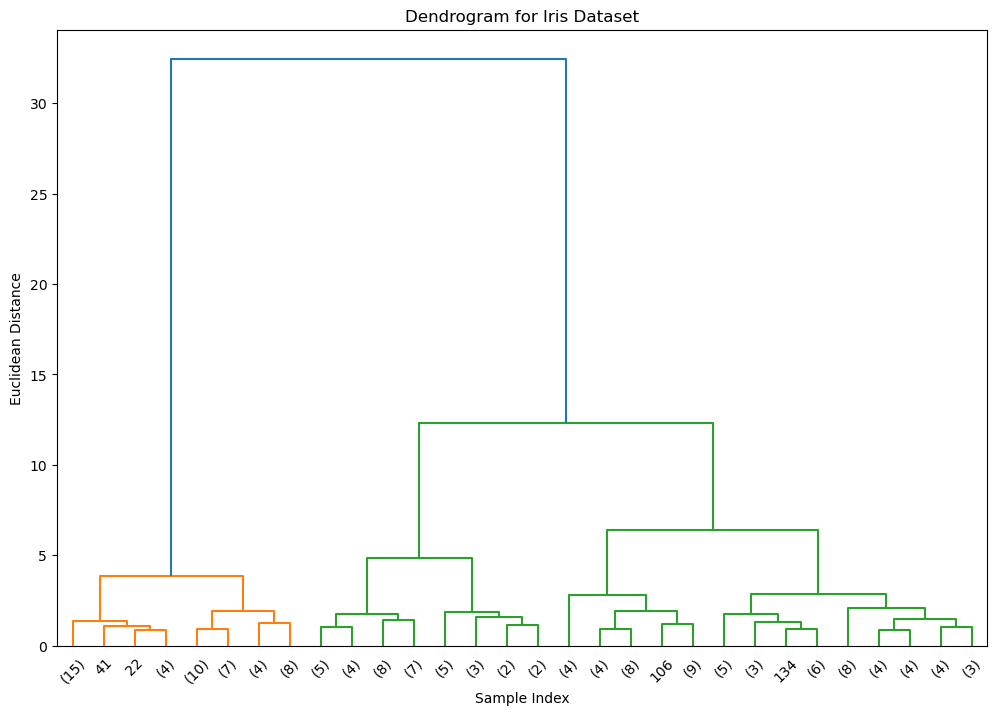

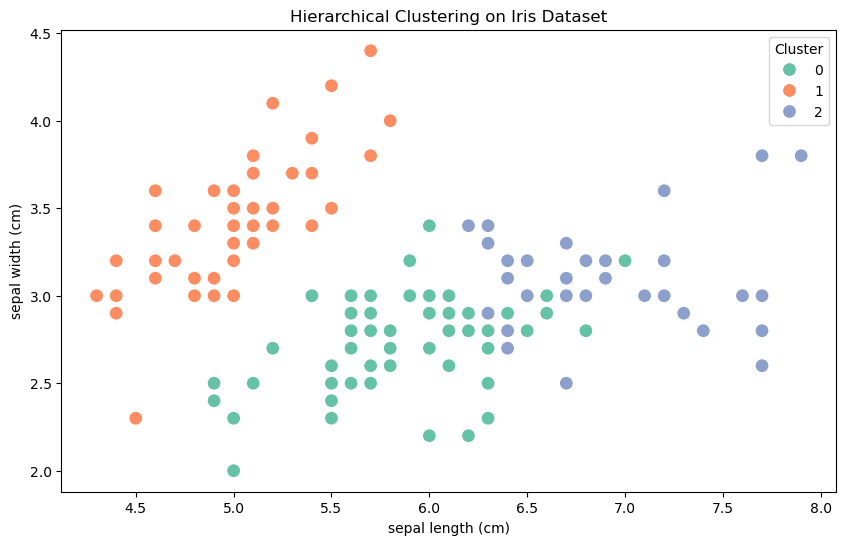

In [7]:
#B) Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
iris_df['Cluster_Hierarchical'] = hierarchical.fit_predict(iris_df.iloc[:, :4])

# Dendrogram
plt.figure(figsize=(12, 8))
linked = linkage(iris_df.iloc[:, :4], method='ward')
dendrogram(linked, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1],
    hue=iris_df['Cluster_Hierarchical'], palette='Set2', s=100
)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()


Hierarchical Clustering
1. Description of Hierarchical Clustering Hierarchical clustering builds a tree (dendrogram) of clusters:

Agglomerative approach: Starts with each data point as its own cluster and merges them step by step based on proximity.
Divisive approach: Starts with all points in one cluster and splits them iteratively.
Why Hierarchical Clustering is suitable for the Iris dataset?

It provides a visual representation (dendrogram) of how clusters are formed.
It helps explore the natural groupings in the Iris dataset without assuming the number of clusters upfront.